In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string


print('deepa')

In [10]:
data_fake=pd.read_csv('Country-wise-COVID-cases.csv')
data_true=pd.read_csv('Customers.csv')
data_fake.head()


,Country Name,Total Infected,Total Deaths,Total Recovered,Death %,Recovered %
0,USA,47916190,783565,37918301.0,1.6,79.1
1,India,34447536,463655,33849785.0,1.3,98.3
2,Brazil,21957967,611318,21151342.0,2.8,96.3
3,UK,9561099,142898,7825200.0,1.5,81.8
4,Russia,9109094,256597,7812557.0,2.8,85.8


In [11]:
data_true.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [14]:
dread=pd.read_csv('news.csv')
dread.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [15]:
dread.shape




(6335, 4)

In [16]:
labels=dread.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [6]:
#split the data set
from sklearn.model_selection import train_test_split



In [17]:
dread.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [19]:
x_train,x_test,y_train,y_test=train_test_split(dread['text'], labels, test_size=0.4, random_state=9)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [22]:
tfidvect=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidvect.fit_transform(x_train) 
tfidf_test=tfidvect.transform(x_test)

In [23]:
#DataFlair - Initialize a PassiveAggressiveClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.17%


In [29]:
from  sklearn import metrics 
con_mat=metrics.confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(con_mat)

[[1179   68]
 [ 105 1182]]


In [31]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = [False, True])

NameError: name 'pl0t' is not defined

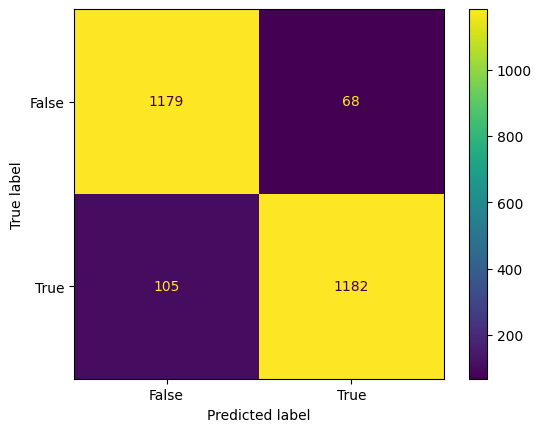

In [33]:
cm_display.plot()
pl0t.show()